In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress



#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [2]:
clean_data.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [3]:
# display the columns related to citizenship data 
start_df = pd.DataFrame(clean_data[['gender', 'ageBroad','Exploit Country', 'Citizenship Country', 'Citizenship Region', 'Citizenship Intermediate Region', 'Citizenship Sub-Region']])
start_df.head()

,gender,ageBroad,Exploit Country,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
0,Female,18--20,unknown,Colombia,Americas,South America,Latin America and the Caribbean
1,Female,18--20,unknown,Colombia,Americas,South America,Latin America and the Caribbean
2,Female,18--20,unknown,Colombia,Americas,South America,Latin America and the Caribbean
3,Female,18--20,unknown,Colombia,Americas,South America,Latin America and the Caribbean
4,Female,18--20,unknown,Colombia,Americas,South America,Latin America and the Caribbean


In [4]:
# create a new data frame that doesn't include the 'Citizenship Intermediate Region' bc it has missing info & isn't of importance to me rn
citizen_df = pd.DataFrame(clean_data[['gender', 'ageBroad','Exploit Country', 'Citizenship Region', 'Citizenship Sub-Region', 'Citizenship Country',]])
citizen_df.count()

gender                    48773
ageBroad                  48773
Exploit Country           47896
Citizenship Region        48773
Citizenship Sub-Region    48773
Citizenship Country       48773
dtype: int64

In [5]:
citizen_df.nunique()

gender                     2
ageBroad                  10
Exploit Country           58
Citizenship Region         5
Citizenship Sub-Region    10
Citizenship Country       45
dtype: int64

In [6]:
citizen_df_renamed = citizen_df.rename(columns = {'gender' : 'Gender', 'ageBroad' : 'Age Range',})
citizen_df_renamed.head()

,Gender,Age Range,Exploit Country,Citizenship Region,Citizenship Sub-Region,Citizenship Country
0,Female,18--20,unknown,Americas,Latin America and the Caribbean,Colombia
1,Female,18--20,unknown,Americas,Latin America and the Caribbean,Colombia
2,Female,18--20,unknown,Americas,Latin America and the Caribbean,Colombia
3,Female,18--20,unknown,Americas,Latin America and the Caribbean,Colombia
4,Female,18--20,unknown,Americas,Latin America and the Caribbean,Colombia


In [7]:
exploit_country_totals = citizen_df_renamed['Exploit Country'].value_counts().rename_axis('Exploit Country').reset_index(name = 'Cases')
exploit_country_totals


,Exploit Country,Cases
0,United States of America,12512
1,unknown,10175
2,Ukraine,5399
3,Republic of Moldova,4504
4,Russian Federation,2738
5,Philippines,1988
6,Indonesia,1777
7,Cambodia,1000
8,Malaysia,930
9,Ghana,544


In [8]:
from_country_totals = citizen_df_renamed['Citizenship Country'].value_counts().rename_axis('Citizenship Country').reset_index(name = 'Cases')
from_country_totals

,Citizenship Country,Cases
0,Philippines,11365
1,unknown,9136
2,Ukraine,7761
3,Republic of Moldova,5901
4,United States of America,3636
5,Cambodia,1979
6,Indonesia,1971
7,Belarus,1463
8,Myanmar,1250
9,Romania,655


In [9]:

#data file to work with
Gini_file = '../data/GiniIndexData.csv'

#read data file
Gini_data = pd.read_csv(Gini_file, low_memory = False)
Gini_data_2018 =pd.DataFrame(Gini_data[['Country Name','Country Code',"2018 [YR2018]"]])
Gini_data_2018_clean = Gini_data_2018.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Gini_data_2018_clean.head(10)
#insuffficient data at a country level to perform regression - there were fewer values calculated for 2019

,Country Name,Country Code,2018 [YR2018]
0,Afghanistan,AFG,..
1,Albania,ALB,..
2,Algeria,DZA,..
3,American Samoa,ASM,..
4,Andorra,AND,..
5,Angola,AGO,51.3
6,Antigua and Barbuda,ATG,..
7,Argentina,ARG,41.4
8,Armenia,ARM,34.4
9,Aruba,ABW,..


## Abandon Gini index regression efforts due to insuffficient data at a country level

In [10]:
#data file to work with for GDP
GDP_file = '../data/WorldBankGDPbyPPP.csv'

#read data file
GDP_data = pd.read_csv(GDP_file, low_memory = False)
GDP_data.columns
GDP_data_2019 =pd.DataFrame(GDP_data[['Country Name','Country Code','2019 [YR2019]']])
GDP_data_2019_clean = GDP_data_2019.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
GDP_data_2019_clean

,Country Name,Country Code,2019 [YR2019]
0,Afghanistan,AFG,2293.551684
1,Albania,ALB,14495.078510
2,Algeria,DZA,11820.087680
3,American Samoa,ASM,0.000000
4,Andorra,AND,0.000000
...,...,...,...
259,Sub-Saharan Africa,SSF,3919.213146
260,Sub-Saharan Africa (excluding high income),SSA,3893.963319
261,Sub-Saharan Africa (IDA & IBRD countries),TSS,3919.213146
262,Upper middle income,UMC,17524.590440


In [11]:
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
#          left_index=False, right_index=False, sort=True,
#          suffixes=('_x', '_y'), copy=True, indicator=False,
#          validate=None)
GDP_citizen_df = pd.merge(from_country_totals,GDP_data_2019_clean,how = 'left',left_on='Citizenship Country', right_on='Country Name').drop('Country Name', axis=1)
GDP_citizen_df_clean = GDP_citizen_df.dropna()
GDP_citizen_df_clean2 = GDP_citizen_df_clean.rename(columns={'2019 [YR2019]':'GDP_PPP'})
GDP_citizen_df_clean2

,Citizenship Country,Cases,Country Code,GDP_PPP
0,Philippines,11365,PHL,9277.374369
2,Ukraine,7761,UKR,13341.210520
3,Republic of Moldova,5901,MDA,13574.051430
4,United States of America,3636,USA,65118.358330
5,Cambodia,1979,KHM,4570.694289
6,Indonesia,1971,IDN,12301.752900
7,Belarus,1463,BLR,19943.292520
8,Myanmar,1250,MMR,5355.270190
9,Romania,655,ROU,32297.303370
10,Ghana,544,GHA,5636.953910


In [12]:
GDP_citizen_df_clean3 = GDP_citizen_df_clean2[GDP_citizen_df_clean2['GDP_PPP']!=0].reset_index()
GDP_citizen_df_clean3

,index,Citizenship Country,Cases,Country Code,GDP_PPP
0,0,Philippines,11365,PHL,9277.374369
1,2,Ukraine,7761,UKR,13341.210520
2,3,Republic of Moldova,5901,MDA,13574.051430
3,4,United States of America,3636,USA,65118.358330
4,5,Cambodia,1979,KHM,4570.694289
5,6,Indonesia,1971,IDN,12301.752900
6,7,Belarus,1463,BLR,19943.292520
7,8,Myanmar,1250,MMR,5355.270190
8,9,Romania,655,ROU,32297.303370
9,10,Ghana,544,GHA,5636.953910


In [13]:
#data file to work with for population
pop_file = '../data/WorldBankPopulation2019_Data.csv'

#read data file
pop_data = pd.read_csv(pop_file, low_memory = False)
pop_data.columns
pop_data_2019 =pd.DataFrame(pop_data[['Country Code','2019 [YR2019]']])
pop_data_2019_clean = pop_data_2019.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
pop_data_2019_clean2 = pop_data_2019_clean.rename(columns={'2019 [YR2019]':'Population_2019'})
pop_data_2019_clean2

,Country Code,Population_2019
0,AFG,3.804175e+07
1,ALB,2.854191e+06
2,DZA,4.305305e+07
3,ASM,5.531200e+04
4,AND,7.714200e+04
...,...,...
253,PSE,4.685306e+06
254,WLD,7.673534e+09
255,YEM,2.916192e+07
256,ZMB,1.786103e+07


In [14]:
GDP_pop_citizen_df = pd.merge(GDP_citizen_df_clean3,pop_data_2019_clean2,how = 'inner',left_on='Country Code', right_on='Country Code')
GDP_pop_citizen_df['cases_per_mil'] = GDP_pop_citizen_df['Cases']/GDP_pop_citizen_df['Population_2019']*1000000
GDP_pop_citizen_df



,index,Citizenship Country,Cases,Country Code,GDP_PPP,Population_2019,cases_per_mil
0,0,Philippines,11365,PHL,9277.374369,1.081166e+08,105.117978
1,2,Ukraine,7761,UKR,13341.210520,4.438516e+07,174.855760
2,3,Republic of Moldova,5901,MDA,13574.051430,2.657637e+06,2220.393530
3,4,United States of America,3636,USA,65118.358330,3.282395e+08,11.077277
4,5,Cambodia,1979,KHM,4570.694289,1.648654e+07,120.037301
5,6,Indonesia,1971,IDN,12301.752900,2.706256e+08,7.283126
6,7,Belarus,1463,BLR,19943.292520,9.466856e+06,154.539163
7,8,Myanmar,1250,MMR,5355.270190,5.404542e+07,23.128694
8,9,Romania,655,ROU,32297.303370,1.935654e+07,33.838685
9,10,Ghana,544,GHA,5636.953910,3.041786e+07,17.884232


rvalue = 0.033528533104623906


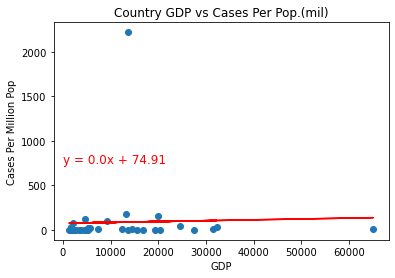

In [15]:
from scipy.stats import linregress
x_values = GDP_pop_citizen_df['GDP_PPP']
y_values = GDP_pop_citizen_df['cases_per_mil']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,750),fontsize=12,color="red")
plt.ylabel('Cases Per Million Pop')
plt.xlabel('GDP')
plt.title('Country GDP vs Cases Per Pop.(mil)')
plt.savefig('How Does GDP relate to Cases')
print(f'rvalue = {rvalue}')
plt.show()

rvalue = 0.06286258305728792


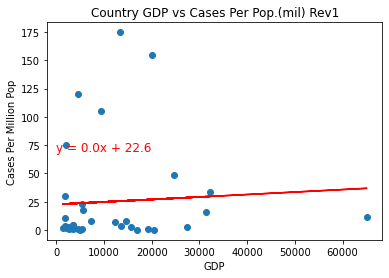

In [16]:
#remove Republic of Moldova from dataset since it is an outlier
GDP_pop_citizen_df_limit = GDP_pop_citizen_df[GDP_pop_citizen_df['Citizenship Country']!= 'Republic of Moldova' ]

x_values = GDP_pop_citizen_df_limit['GDP_PPP']
y_values = GDP_pop_citizen_df_limit['cases_per_mil']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,70),fontsize=12,color="red")
plt.ylabel('Cases Per Million Pop')
plt.xlabel('GDP')
plt.title('Country GDP vs Cases Per Pop.(mil) Rev1')
plt.savefig('How Does GDP relate to Cases Rev1')
print(f'rvalue = {rvalue}')
plt.show()

In [17]:
#data file to work with for population
dem_file = '../data/political-regime-updated2016.csv'

#read data file
dem_data = pd.read_csv(dem_file, low_memory = False)
dem_data = dem_data[dem_data['Year'] == 2015]
dem_index = dem_data.rename(columns={'Political Regime (OWID based on Polity IV and Wimmer & Min)':'Dem_Index'})
dem_index_2 = dem_index[['Code','Dem_Index']].dropna()
combined_data = pd.merge(GDP_pop_citizen_df_limit,dem_index_2,how = 'inner',left_on='Country Code', right_on='Code').drop('Code', axis=1)
combined_data


,index,Citizenship Country,Cases,Country Code,GDP_PPP,Population_2019,cases_per_mil,Dem_Index
0,0,Philippines,11365,PHL,9277.374369,1.081166e+08,105.117978,8
1,2,Ukraine,7761,UKR,13341.210520,4.438516e+07,174.855760,4
2,4,United States of America,3636,USA,65118.358330,3.282395e+08,11.077277,10
3,5,Cambodia,1979,KHM,4570.694289,1.648654e+07,120.037301,2
4,6,Indonesia,1971,IDN,12301.752900,2.706256e+08,7.283126,9
5,7,Belarus,1463,BLR,19943.292520,9.466856e+06,154.539163,-7
6,9,Romania,655,ROU,32297.303370,1.935654e+07,33.838685,9
7,10,Ghana,544,GHA,5636.953910,3.041786e+07,17.884232,8
8,12,Bulgaria,342,BGR,24561.182610,6.975761e+06,49.026909,9
9,13,Haiti,339,HTI,1800.564561,1.126308e+07,30.098347,0


rvalue = -0.09301104001344164


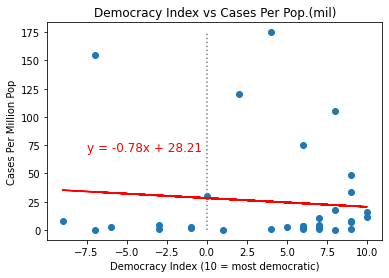

In [35]:
x_values = combined_data['Dem_Index']
y_values = combined_data['cases_per_mil']

plt.vlines(0,0,175, linestyles ='dotted', colors = 'grey')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-7.50,70),fontsize=12,color="red")
plt.ylabel('Cases Per Million Pop')
plt.xlabel('Democracy Index (10 = most democratic)')
plt.title('Democracy Index vs Cases Per Pop.(mil)')
plt.savefig('How Does Democracy Relate to Cases')
print(f'rvalue = {rvalue}')
plt.show()